In [1]:
#4 app per game
#160 games per season
#20 seasons
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sim_career(phit, n_seasons = 20, n_games = 160, n_app_per_game = 4):
    streak = 0
    max_streak = 0
    for i in range(n_seasons):
        for j in range(n_games):
            if np.any(np.random.random(n_app_per_game) < phit):
                streak = streak + 1
            else:
                if streak > max_streak:
                    max_streak = streak
                streak = 0
    #Gotta check again in case current streak is max_streak and has yet to be updated
    if streak > max_streak:
        max_streak = streak
    return max_streak

In [3]:
def sim(n, phit, n_seasons = 20, n_games = 160, n_app_per_game = 4):
    success = 0
    streak = []
    for i in range(n):
        result = sim_career(phit, n_seasons, n_games, n_app_per_game)
        streak.append(result)
        success = success + 1 if result > 56 else success
    return (streak, success/n)

In [4]:
p1 = sim(1000, 0.2)
p1[1]

0.0

In [5]:
p2 = sim(1000, 0.25)
p2[1]

0.0

In [6]:
p3 = sim(1000, 0.3)
p3[1]

0.0

In [7]:
p4 = sim(1000, 0.35)
p4[1]

0.005

In [8]:
p5 = sim(1000, 0.4)
p5[1]

0.125

In [9]:
cheater = sim(1000, 0.5, 10)
cheater[1]

0.937

In [10]:
totstreak = p1[0]+p2[0]+p3[0]+p4[0]+p5[0]+cheater[0]
player = np.repeat(["P1", "P2", "P3", "P4", "P5", "Cheater"], 1000)

In [11]:
df = pd.DataFrame({"Player":player, "Streak":totstreak})

C:\Users\patrick.tawil\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


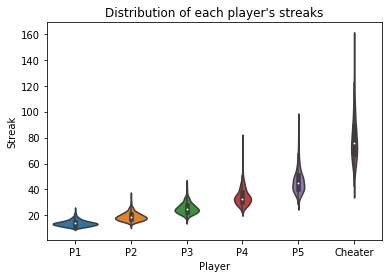

In [12]:
g = sns.violinplot(data = df, x = "Player", y = "Streak")
g.set_title("Distribution of each player's streaks")
g.set_ylabel("Streak")
g.set_xlabel("Player")
plt.show()

C:\Users\patrick.tawil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


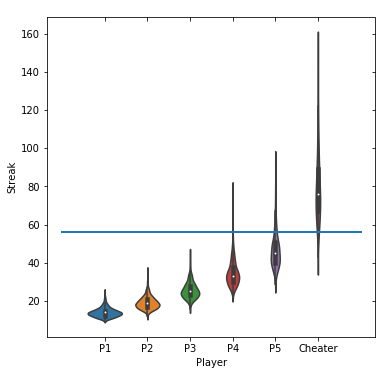

In [13]:
g = sns.JointGrid(data = df, x = "Player", y = "Streak", space=0, height=6, ratio=50)
g.plot_joint(sns.violinplot)
plt.plot([-1, 6], [56, 56], linewidth=2)
plt.show()

C:\Users\patrick.tawil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


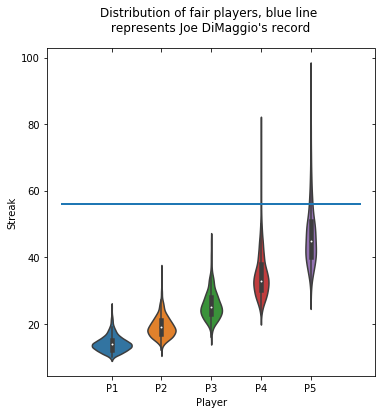

In [14]:
g = sns.JointGrid(data = df[df["Player"] != "Cheater"], x = "Player", y = "Streak", space=0, height=6, ratio=50)
g.plot_joint(sns.violinplot)
plt.plot([-1, 5], [56, 56], linewidth=2)
plt.subplots_adjust(top=0.90)
g.fig.suptitle("Distribution of fair players, blue line\n represents Joe DiMaggio's record") # can also get the figure from plt.gcf(
plt.show()

In [15]:
#Thus most of the time the cheater will be beating the record within only 10 seasons. Meanwhile even a player with a 0.4 would
#not often beat Joe DiMaggio's record. And a player with a 0.35 would also rarely beat it. Anything lower would basically never
#achieve that feat. This really shows how significant Joe DiMaggio's record is.